In [7]:
"""
Maxis Notebook for testing

"""

'\nMaxis Notebook for testing\n\n'

In [8]:
# Must have imports
import helper
from analyzer import Analyzer
from crawler import Crawler
from plotter import Plotter
from model import TextBlob, TrainedSentimentModel, Vader
import tensorflow

In [9]:
# Extra imports
import datetime
import numpy as np
import tweepy

In [10]:
# Sample Config
config = {
	"user_auth": False, # autheticate as user or application
    "search": {
        "location": "darmstadt",	# based on helper.GEOCODES dictionary
        "radius": 100, # optional default to 100
        "query": ['corona'], # query for searching (str array), either query or location has to be not empty
        "max_searches": 5000, # Default: 1000 max amount of searches 
        "num_results": 5000, # number of results with defined filter options
        "rate_limit": True,  # Default True: to turn off rate limit prints
        "filter": { # Filter applies to search
            "not_reply": True, # Filters for not replies when true, does nothing when false
            "not_retweet": True, # Filters for not retweets when true, does nothing when false
            "until": datetime.datetime(2020, 3, 1), # None or datetime (e.g. datetime.datetime(2020, 5, 20))
        }
    },
	"get_user": { # Optional, only when querying for users
		"good_user": True, # mandatory
		"search_type": "recent_user", # 'recent_user', 'recent_retweeted_user'
		"num_users": 100, # mandatory
	},
	"plot": {
		"title": "Testing",
	},
    # Full search not tested and should only be used with caution!
    "full_search": {
        "query": "#Corona lang:de", # the query used for full search
        "env_name": "dev", # your premium environment name
        "fromDate": "2020" + "01" + "15" + "1200", # Format: YYYYMMDDHHmm
        "toDate": "2020" + "06" + "01" + "1200"
    }
}


In [11]:
# Load configs and init models
config = helper.init_config(config)

modl = TextBlob()
modlUs = TrainedSentimentModel()
vader_model = Vader()

craw = Crawler(config)
anal = Analyzer(config, vader_model)
plot = Plotter(config)
sentiment_pos_limit = 0.7
sentiment_neg_limit = -0.7

In [12]:
# Analyze user:
users = craw.get_users()
print(len(users))
# user = craw.get_user_from_id("ZDFheute")
# user = craw.get_user_from_id("BarackObama")
# tweets = craw.get_tweets()
# tweets = craw.get_timeline(users[0])
# len(tweets)

Cond 1: 5
Cond 1: 46
Cond 1: 26
Cond 1: 19
Cond 1: 52
Cond 1: 60
Cond 1: 46
Cond 1: 12
Cond 1: 19
Cond 1: 25
Cond 1: 71
Cond 2
Cond 1: 32
Cond 1: 64
Cond 1: 6
Cond 1: 64
Cond 1: 26
Cond 1: 35
Cond 1: 34
Cond 1: 4
Cond 1: 35
Cond 2
Cond 1: 25
Cond 1: 70
Cond 1: 23
Cond 1: 29
Cond 1: 71
Cond 1: 51
Cond 1: 71
Cond 1: 3
Cond 1: 49
Cond 1: 28
Cond 1: 50
Cond 1: 23
Cond 2
Cond 1: 2
Cond 1: 22
Cond 1: 58
Cond 2
Cond 1: 26
Cond 1: 53
Cond 1: 49
Cond 1: 42
Cond 1: 27
Cond 1: 33
Cond 1: 24
Cond 1: 34
Cond 1: 25
Cond 1: 29
Cond 1: 25
Cond 1: 20
Cond 1: 36
Cond 1: 27
Cond 1: 2
Cond 1: 57
Cond 1: 66
Cond 1: 5
Cond 1: 54
Cond 1: 43
Cond 1: 10
Cond 1: 29
Cond 1: 27
Cond 1: 4
Cond 1: 23
Cond 2
Cond 1: 26
Cond 1: 26
Cond 1: 32
Cond 2
Cond 1: 53
Cond 1: 27
Cond 1: 21
Cond 1: 8
Cond 1: 32
Cond 1: 51
Cond 1: 3
Cond 1: 43
Cond 1: 46
Cond 2
Cond 1: 10
Cond 1: 28
Cond 1: 36
Cond 2
Cond 1: 33
Cond 1: 20
Cond 1: 52
Cond 1: 51
Cond 1: 45
Cond 1: 48
Cond 1: 37
remaining requests: 418
tweets remaining: ~ 6270
res

In [13]:
# tweets = craw.get_full_timeline_until(users[0])
all_tweets = []
number_of_fails = 0
for user in users:    
    full_timeline = craw.get_full_timeline_until(user)
    if full_timeline == []:
        number_of_fails += 1
    else:
        all_tweets.append(full_timeline)
print(number_of_fails)

Search reached end point
Checked Tweets: 1941
remaining requests: 320
tweets remaining: ~ 4800
reset at: 2020-06-24 18:59:06
reset in: 05:49
Search reached end point
Checked Tweets: 1032
remaining requests: 268
tweets remaining: ~ 4020
reset at: 2020-06-24 18:59:06
reset in: 05:37
Checked Tweets: 3142
remaining requests: 106
tweets remaining: ~ 1590
reset at: 2020-06-24 18:59:06
reset in: 04:53
Search reached end point
Checked Tweets: 1915
remaining requests: 3
tweets remaining: ~ 45
reset at: 2020-06-24 18:59:06
reset in: 04:26


Rate limit reached. Sleeping for: 267


Search reached end point
Checked Tweets: 1607
remaining requests: 1422
tweets remaining: ~ 21330
reset at: 2020-06-24 19:14:12
reset in: 14:40
Checked Tweets: 3108
remaining requests: 1260
tweets remaining: ~ 18900
reset at: 2020-06-24 19:14:12
reset in: 13:56
Search reached end point
Checked Tweets: 217
remaining requests: 1249
tweets remaining: ~ 18735
reset at: 2020-06-24 19:14:12
reset in: 13:53
Search reached end point
Checked Tweets: 2530
remaining requests: 1116
tweets remaining: ~ 16740
reset at: 2020-06-24 19:14:12
reset in: 13:18
Search reached end point
Checked Tweets: 37
remaining requests: 1114
tweets remaining: ~ 16710
reset at: 2020-06-24 19:14:12
reset in: 13:17
Checked Tweets: 3039
remaining requests: 950
tweets remaining: ~ 14250
reset at: 2020-06-24 19:14:12
reset in: 12:33
Checked Tweets: 3207
remaining requests: 788
tweets remaining: ~ 11820
reset at: 2020-06-24 19:14:12
reset in: 11:49
Search reached end point
Checked Tweets: 868
remaining requests: 743
tweets rem

Rate limit reached. Sleeping for: 513


Search reached end point
Checked Tweets: 1249
remaining requests: 1478
tweets remaining: ~ 22170
reset at: 2020-06-24 19:29:17
reset in: 14:55
Search reached end point
Checked Tweets: 1370
remaining requests: 1403
tweets remaining: ~ 21045
reset at: 2020-06-24 19:29:17
reset in: 14:35
Search reached end point
Checked Tweets: 1299
remaining requests: 1337
tweets remaining: ~ 20055
reset at: 2020-06-24 19:29:17
reset in: 14:18
Search reached end point
Checked Tweets: 148
remaining requests: 1329
tweets remaining: ~ 19935
reset at: 2020-06-24 19:29:17
reset in: 14:16
Search reached end point
Checked Tweets: 678
remaining requests: 1294
tweets remaining: ~ 19410
reset at: 2020-06-24 19:29:17
reset in: 14:07
Search reached end point
Checked Tweets: 2386
remaining requests: 1174
tweets remaining: ~ 17610
reset at: 2020-06-24 19:29:17
reset in: 13:39
Search reached end point
Checked Tweets: 403
remaining requests: 1153
tweets remaining: ~ 17295
reset at: 2020-06-24 19:29:17
reset in: 13:34
Se

Rate limit reached. Sleeping for: 531


Checked Tweets: 3220
remaining requests: 1476
tweets remaining: ~ 22140
reset at: 2020-06-24 19:44:22
reset in: 14:53
Search reached end point
Checked Tweets: 1662
remaining requests: 1392
tweets remaining: ~ 20880
reset at: 2020-06-24 19:44:22
reset in: 14:32
Search reached end point
Checked Tweets: 216
remaining requests: 1381
tweets remaining: ~ 20715
reset at: 2020-06-24 19:44:22
reset in: 14:30
Search reached end point
Checked Tweets: 87
remaining requests: 1376
tweets remaining: ~ 20640
reset at: 2020-06-24 19:44:22
reset in: 14:29
Search reached end point
Checked Tweets: 945
remaining requests: 1328
tweets remaining: ~ 19920
reset at: 2020-06-24 19:44:22
reset in: 14:18
Search reached end point
Checked Tweets: 1220
remaining requests: 1267
tweets remaining: ~ 19005
reset at: 2020-06-24 19:44:22
reset in: 14:05
Search reached end point
Checked Tweets: 2510
remaining requests: 1140
tweets remaining: ~ 17100
reset at: 2020-06-24 19:44:22
reset in: 13:31
Search reached end point
Che

Rate limit reached. Sleeping for: 528


Search reached end point
Checked Tweets: 417
remaining requests: 1487
tweets remaining: ~ 22305
reset at: 2020-06-24 19:59:27
reset in: 14:55
Search reached end point
Checked Tweets: 99
remaining requests: 1482
tweets remaining: ~ 22230
reset at: 2020-06-24 19:59:27
reset in: 14:54
Search reached end point
Checked Tweets: 80
remaining requests: 1478
tweets remaining: ~ 22170
reset at: 2020-06-24 19:59:27
reset in: 14:53
Checked Tweets: 3094
remaining requests: 1315
tweets remaining: ~ 19725
reset at: 2020-06-24 19:59:27
reset in: 14:09
Search reached end point
Checked Tweets: 264
remaining requests: 1301
tweets remaining: ~ 19515
reset at: 2020-06-24 19:59:27
reset in: 14:06
Search reached end point
Checked Tweets: 1114
remaining requests: 1244
tweets remaining: ~ 18660
reset at: 2020-06-24 19:59:27
reset in: 13:52
Search reached end point
Checked Tweets: 854
remaining requests: 1201
tweets remaining: ~ 18015
reset at: 2020-06-24 19:59:27
reset in: 13:40
Search reached end point
Checke

In [5]:
a = datetime.datetime.now()
b = datetime.datetime(2020,6,22, 12, 00)
print((a-b).seconds/3600 + (a-b).days * 24)
helper.hours_until(b)

54.70472222222222


54

In [15]:
flattened = [tweet for tweets in all_tweets for tweet in tweets]
print(len(flattened))
# anal.analyze_and_plot_sentiment_per_week(flattened, 0.7, -0.7)

31811


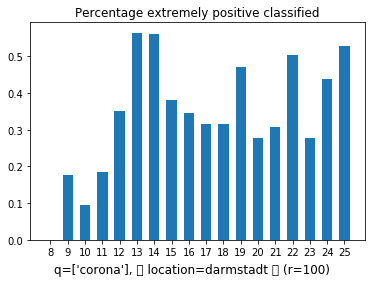

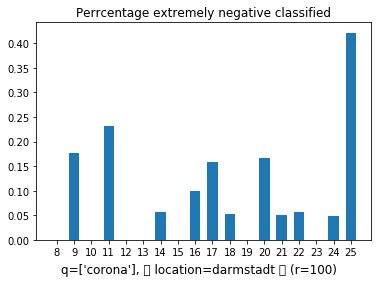

In [19]:
anal.analyze_and_plot_sentiment_per_week(flattened, 0.8, -0.8)

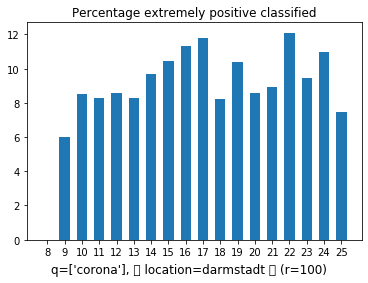

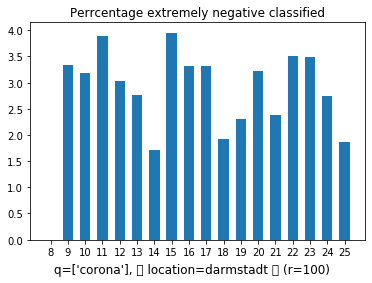

In [33]:
anal.analyze_and_plot_sentiment_per_week(all_data, 0.5, -0.5)

In [7]:
filename = "saved_data/recent_timeline_tweets_1000.json"
tweets = craw.load_tweet(filename)
# craw.save_tweets(tweets, filename)
print(tweets[0].text)
print(tweets[1].text)
print(tweets[2].text)
print(tweets[3].text)

Nach dreimonatiger #Corona-Pause dürfen deutsche "Test-Touristen" erstmals wieder nach #Mallorca reisen. Von Mitarb… https://t.co/BbfbSTD5t6
In der Übergangsphase des #brexit wollen die EU und Großbritannien ein Handelspaket erarbeiten. Bei dem Gespräch zw… https://t.co/ekiRhMlb69
In Brandenburg wird die AfD vom Verfassungsschutz beobachtet. Der Sommerurlaub in 27 Ländern ist jetzt möglich. Das… https://t.co/mePCBJO2AY
Im weltweiten Rennen um einen #Impfstoff gegen das #Coronavirus steigt der Bund mit 300 Millioenen Euro beim deutsc… https://t.co/rKMYFYWIJy


In [16]:
filename = "saved_data/full_timeline/2_31k.json"
tweets = craw.save_tweets(flattened, filename)

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [10]:
res = anal.analyze_sentiment(tweets)
res2 = anal.analyze_timeline(tweets)
# plot.simple_hist(res["ages"])

In [12]:
len(res2["ages"]["tweets_age"])

801

In [23]:
dataBlob = []
fullSenti = []
for tweet in tweets:
    senti = modl.get_polarity_without_preprocessing(tweet.text)
    fullSenti.append(senti)
    # TODO kann man auch auslagern
    # Beste Text Blob sentis: -0.7, 0.7
    if senti > 0.7:
        dataBlob.append('pos')
    elif senti < -0.7:
        dataBlob.append('neg')
    else:
        dataBlob.append('neut')

In [21]:
dataUs = modlUs.get_sentiment_labels_batch([tweet.text for tweet in tweets])
dataUs2 = modlUs.get_sentiment_label_without_preprocessing([tweet.text for tweet in tweets])

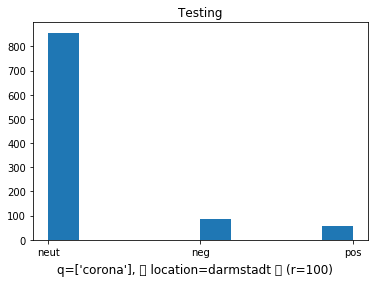

In [22]:
plot.simple_hist(dataUs)

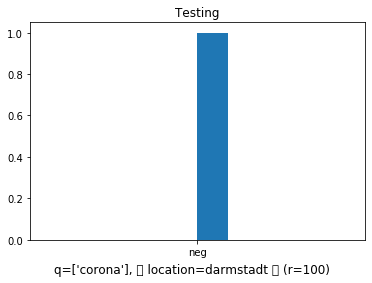

In [25]:
plot.simple_hist(dataUs2)